In [14]:
import os
import json
import numpy as np

# Directory containing JSON files
directory = "/home/chenhui/Documents/verti_bench/baselines/res/TNT_data/fail_rp"

# Initialize a list to store results
results = []

# Loop through all JSON files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".json"):  # Process only JSON files
        file_path = os.path.join(directory, filename)
        with open(file_path, "r") as file:
            data = json.load(file)
            
            # Aggregate all roll_data within the file
            all_roll_data = []
            all_pitch_data = []
            if isinstance(data, list):
                for item in data:
                    all_roll_data.extend(item.get("roll_data", []))
                    all_pitch_data.extend(item.get("pitch_data", []))
            
            # Calculate overall mean and variance for this file
            if all_roll_data and all_pitch_data:
                mean_roll = np.mean(all_roll_data)
                mean_pitch = np.mean(all_pitch_data)
                variance_roll = np.var(all_roll_data)
                variance_pitch = np.var(all_pitch_data)
                results.append({
                    "file": filename,
                    "mean_roll": mean_roll,
                    "variance_roll": variance_roll,
                    "mean_pitch": mean_pitch,
                    "variance_pitch": variance_pitch
                })

# Print the overall results
for result in results:
    # print(f"File: {result['file']}, Overall Mean Roll: {result['mean_roll']:.6f}, Overall Variance Roll: {result['variance_roll']:.6f}, Overall Mean Pitch: {result['mean_pitch']:.6f}, Overall Variance Pitch: {result['variance_pitch']:.6f}")

    print(f"File: {result['file']}, {result['mean_roll']:.6f}, {result['variance_roll']:.6f}, {result['mean_pitch']:.6f},  {result['variance_pitch']:.6f}")


File: world86_data.json, 8.463799, 54.589431, 8.208023,  50.561802
File: world6_data.json, 14.535877, 186.795364, 8.687387,  68.065212
File: world67_data.json, 10.518267, 178.403648, 9.159609,  61.587242
File: world76_data.json, 10.348585, 77.149173, 6.686239,  42.577697
File: world85_data.json, 11.829689, 628.845765, 6.708780,  25.861856
File: world81_data.json, 20.868359, 1319.405259, 11.031828,  78.517616
File: world90_data.json, 12.584884, 349.455036, 7.873397,  60.464763
File: world73_data.json, 8.908599, 45.977506, 8.554822,  54.745090
File: world89_data.json, 9.568238, 58.194954, 7.101678,  37.281152


In [5]:
import os
import glob

# Base directory
base_dir = os.getcwd()

# Path pattern for all config files
config_pattern = os.path.join(base_dir, "/home/chenhui/Documents/verti_bench/envs/data/terrain_bitmaps/BenchMaps/sampled_maps/configTest/Final", "config*.yaml")

# Find all matching config files
matched_files = glob.glob(config_pattern)

# Initialize lists to store grouped config files
low_configs = []
mid_configs = []
high_configs = []

# Categorize config files based on their filenames
for file_path in matched_files:
    filename = os.path.basename(file_path)  # Get the filename (e.g., "config1_low.yaml")
    if "_low" in filename:
        low_configs.append(file_path)
    elif "_mid" in filename:
        mid_configs.append(file_path)
    elif "_high" in filename:
        high_configs.append(file_path)

# Print the results
print(f"Low config files: {len(low_configs)}")
for file in low_configs:
    print(f"  {file}")

print(f"\nMid config files: {len(mid_configs)}")
for file in mid_configs:
    print(f"  {file}")

print(f"\nHigh config files: {len(high_configs)}")
for file in high_configs:
    print(f"  {file}")

Low config files: 35
  /home/chenhui/Documents/verti_bench/envs/data/terrain_bitmaps/BenchMaps/sampled_maps/configTest/Final/config55_low.yaml
  /home/chenhui/Documents/verti_bench/envs/data/terrain_bitmaps/BenchMaps/sampled_maps/configTest/Final/config33_low.yaml
  /home/chenhui/Documents/verti_bench/envs/data/terrain_bitmaps/BenchMaps/sampled_maps/configTest/Final/config100_low.yaml
  /home/chenhui/Documents/verti_bench/envs/data/terrain_bitmaps/BenchMaps/sampled_maps/configTest/Final/config77_low.yaml
  /home/chenhui/Documents/verti_bench/envs/data/terrain_bitmaps/BenchMaps/sampled_maps/configTest/Final/config97_low.yaml
  /home/chenhui/Documents/verti_bench/envs/data/terrain_bitmaps/BenchMaps/sampled_maps/configTest/Final/config75_low.yaml
  /home/chenhui/Documents/verti_bench/envs/data/terrain_bitmaps/BenchMaps/sampled_maps/configTest/Final/config87_low.yaml
  /home/chenhui/Documents/verti_bench/envs/data/terrain_bitmaps/BenchMaps/sampled_maps/configTest/Final/config41_low.yaml
  

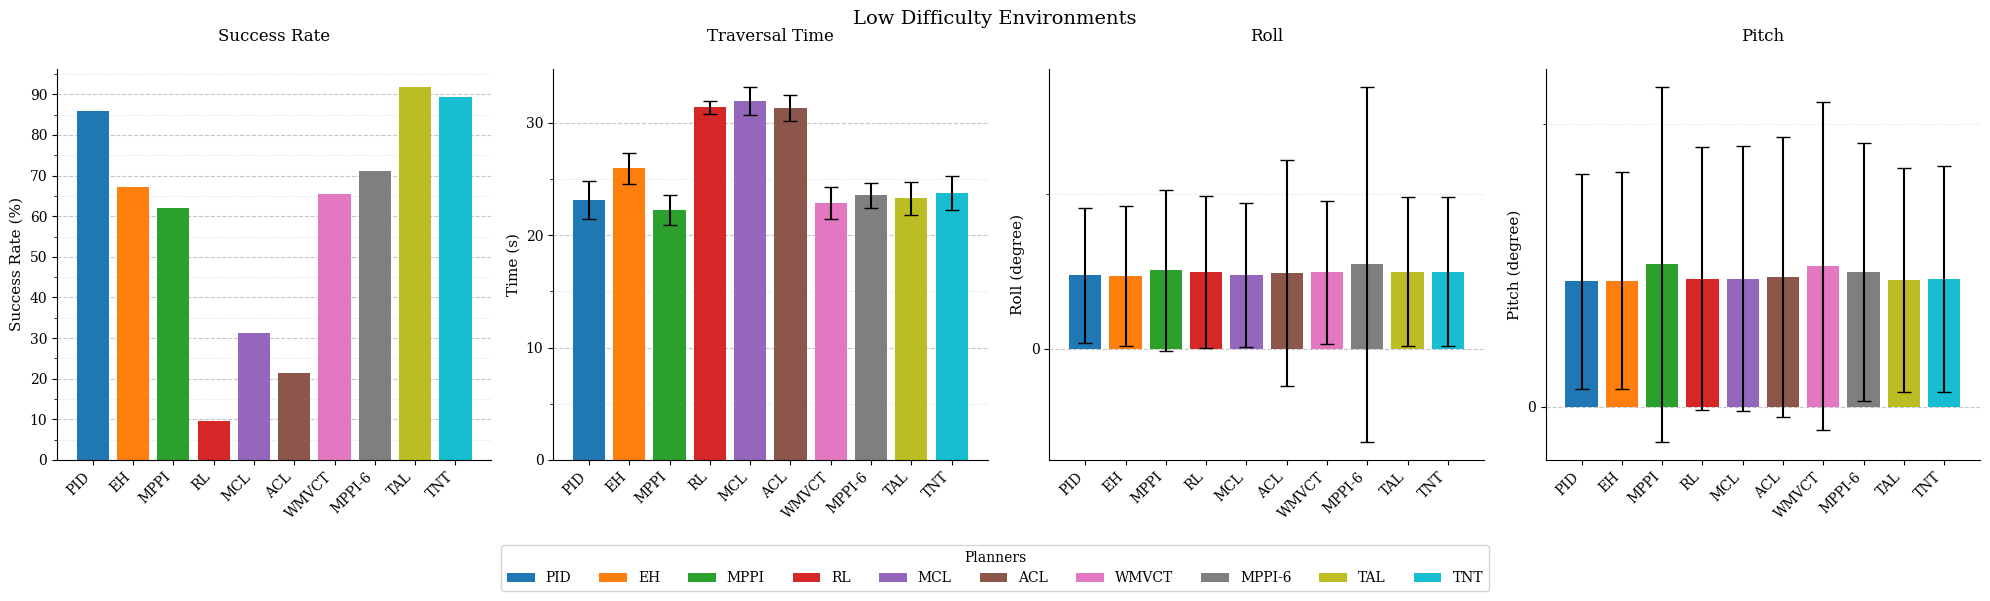

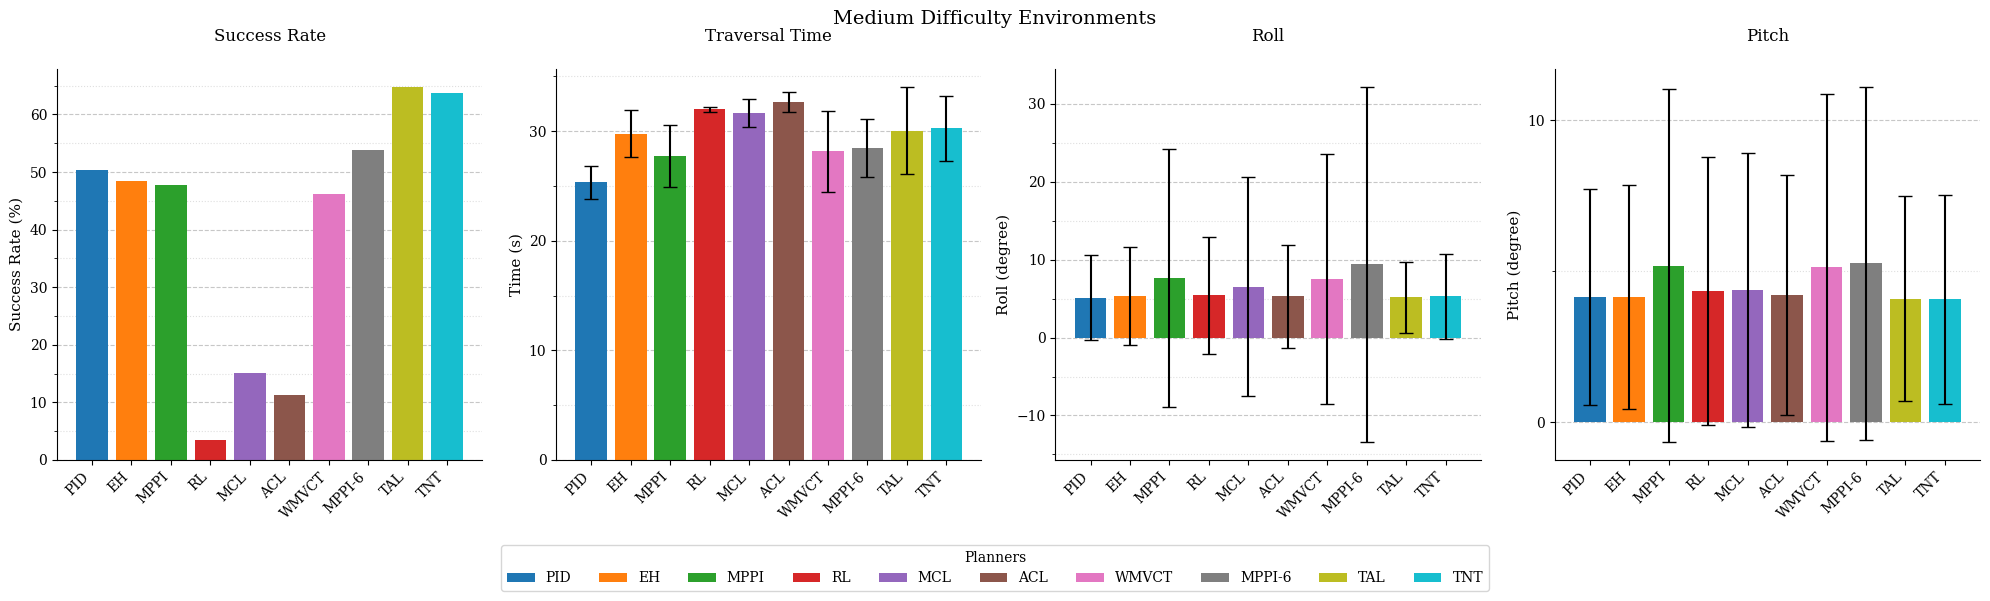

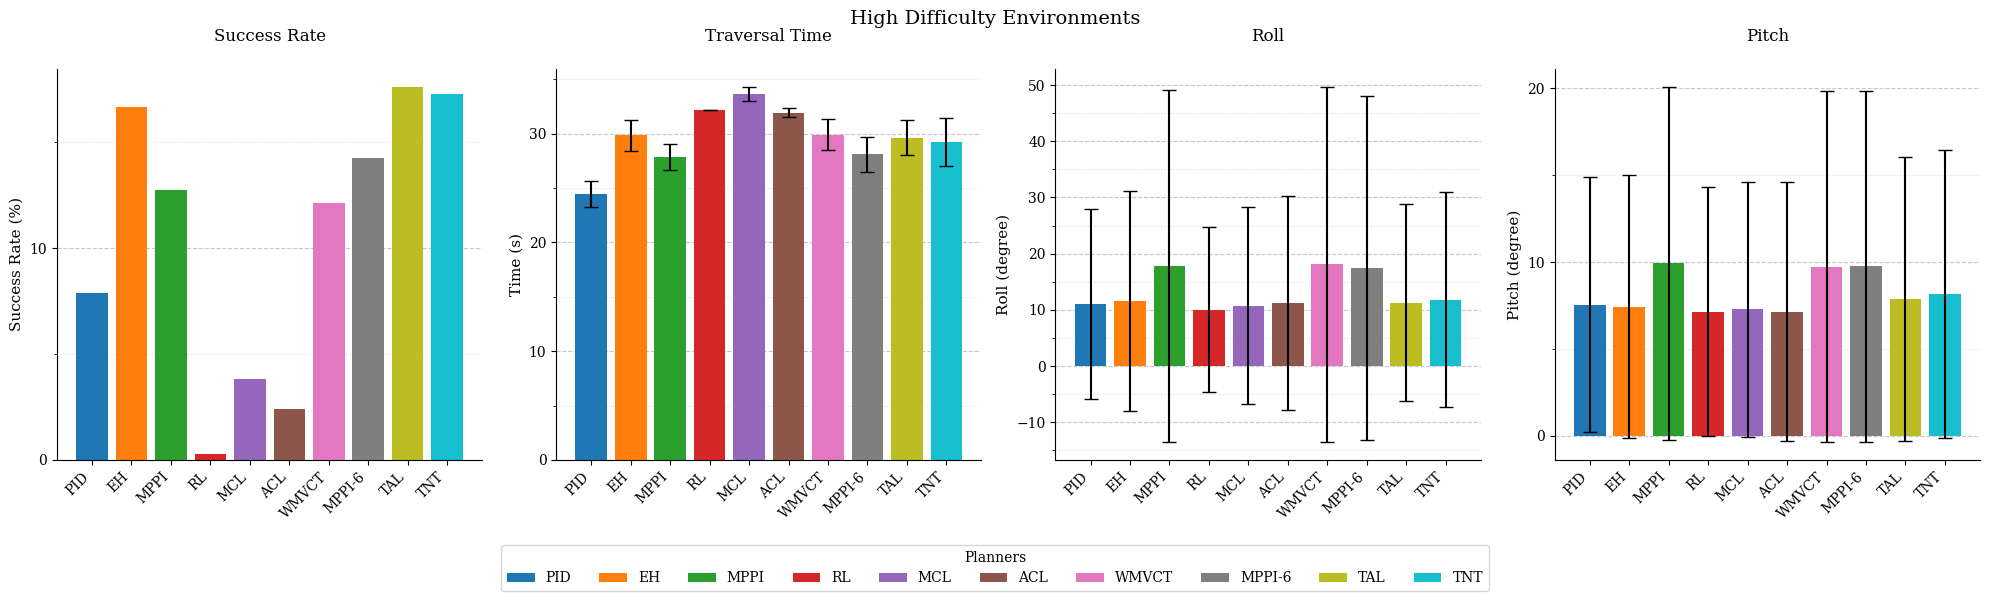

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['font.family'] = 'DejaVu Serif'

def create_difficulty_mapping():
    difficulty_map = {}
    
    low_worlds = [5, 9, 11, 13, 18, 21, 22, 24, 25, 26, 30, 33, 37, 41, 42, 
                 45, 48, 49, 54, 55, 56, 58, 74, 75, 77, 79, 80, 84, 87, 
                 93, 94, 96, 97, 98, 100]
    
    mid_worlds = [3, 7, 8, 14, 16, 17, 20, 28, 29, 31, 32, 34, 35, 36, 40, 
                 46, 52, 53, 62, 63, 66, 68, 69, 71, 78, 82, 83, 88, 90, 
                 91, 95, 99]
    
    high_worlds = [1, 2, 4, 6, 10, 12, 15, 19, 23, 27, 38, 39, 43, 44, 47, 
                  50, 51, 57, 59, 60, 61, 64, 65, 67, 70, 72, 73, 76, 81, 
                  85, 86, 89, 92]
    
    for world in low_worlds:
        difficulty_map[world] = 'Low'
    for world in mid_worlds:
        difficulty_map[world] = 'Medium'
    for world in high_worlds:
        difficulty_map[world] = 'High'
        
    return difficulty_map

def load_and_process_csvs(root_directory):
    data = []
    difficulty_map = create_difficulty_mapping()
    folders = sorted([d for d in os.listdir(root_directory) if os.path.isdir(os.path.join(root_directory, d))])
    
    for folder in folders:
        folder_path = os.path.join(root_directory, folder)
        csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
        
        if csv_files:
            csv_file = csv_files[0]
            df = pd.read_csv(os.path.join(folder_path, csv_file))
            df.columns = ['world_id'] + list(df.columns[1:])
            
            df['difficulty'] = df['world_id'].map(difficulty_map)
            
            for difficulty in ['Low', 'Medium', 'High']:
                df_filtered = df[df['difficulty'] == difficulty]
                if len(df_filtered) > 0:
                    stats = {
                        'name': folder,
                        'difficulty': difficulty,
                        'success_rate': df_filtered['success_rate'].mean() * 100,
                        'traversal_time': df_filtered['mean_traversal_time'].mean(),
                        'traversal_time_std': np.sqrt(df_filtered['variance_traversal_time'].mean()),
                        'roll': df_filtered['mean_roll'].mean(),
                        'roll_std': np.sqrt(df_filtered['variance_roll'].mean()),
                        'pitch': df_filtered['mean_pitch'].mean(),
                        'pitch_std': np.sqrt(df_filtered['variance_pitch'].mean())
                    }
                    data.append(stats)
    
    return pd.DataFrame(data)

def plot_metrics_by_difficulty(data):
    planner_order = ['PID', 'EH', 'MPPI', 'RL', 'MCL', 'ACL', 'WMVCT', 'MPPI-6', 'TAL', 'TNT']
    
    planner_colors = {
        'PID': '#1f77b4', 'EH': '#ff7f0e', 'MPPI': '#2ca02c', 'RL': '#d62728',
        'MCL': '#9467bd', 'ACL': '#8c564b', 'WMVCT': '#e377c2', 'MPPI-6': '#7f7f7f',
        'TAL': '#bcbd22', 'TNT': '#17becf'
    }
    
    metrics = ['success_rate', 'traversal_time', 'roll', 'pitch']
    ylabels = ['Success Rate (%)', 'Time (s)', 'Roll (degree)', 'Pitch (degree)']
    
    for difficulty in ['Low', 'Medium', 'High']:
        fig, axes = plt.subplots(1, 4, figsize=(20, 6))
        df_diff = data[data['difficulty'] == difficulty]
        
        for ax, metric, ylabel in zip(axes, metrics, ylabels):
            df_ordered = pd.DataFrame([df_diff[df_diff['name'] == planner].iloc[0] 
                                     for planner in planner_order])
            
            x_positions = np.arange(len(planner_order))
            bars = []
            
            for idx, (_, row) in enumerate(df_ordered.iterrows()):
                color = planner_colors[row['name']]
                bar = ax.bar(x_positions[idx], row[metric], color=color)
                bars.append(bar[0])
            
            if metric in ['traversal_time', 'roll', 'pitch']:
                ax.errorbar(x_positions, df_ordered[metric],
                          yerr=df_ordered[f'{metric}_std'], fmt='none',
                          color='black', capsize=5)
            
            ax.set_title(f'{metric.replace("_", " ").title()}', 
                        fontsize=12, pad=20)
            ax.set_ylabel(ylabel, fontsize=11)
            ax.tick_params(axis='both', labelsize=10)
            
            # Modify grid settings
            ax.grid(True, axis='y', linestyle='--', alpha=0.7)
            ax.yaxis.set_major_locator(plt.MultipleLocator(10))  # Set major grid lines every 10 units
            ax.yaxis.set_minor_locator(plt.MultipleLocator(5))   # Set minor grid lines every 5 units
            ax.grid(True, which='minor', axis='y', linestyle=':', alpha=0.4)
            
            # Remove top and right spines
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            
            ax.set_xticks(x_positions)
            ax.set_xticklabels(planner_order, rotation=45, ha='right')
        
        fig.legend(bars, planner_order, 
                  title='Planners',
                  loc='center',
                  bbox_to_anchor=(0.5, 0.02),
                  ncol=len(planner_order),
                  fontsize=10)
        
        plt.suptitle(f'{difficulty} Difficulty Environments', 
                    fontsize=14, y=0.95)
        
        plt.tight_layout()
        plt.subplots_adjust(bottom=0.2)
        plt.show()

# Usage example
root_directory = '/home/chenhui/Documents/verti_bench/baselines/res'
data = load_and_process_csvs(root_directory)
plot_metrics_by_difficulty(data)

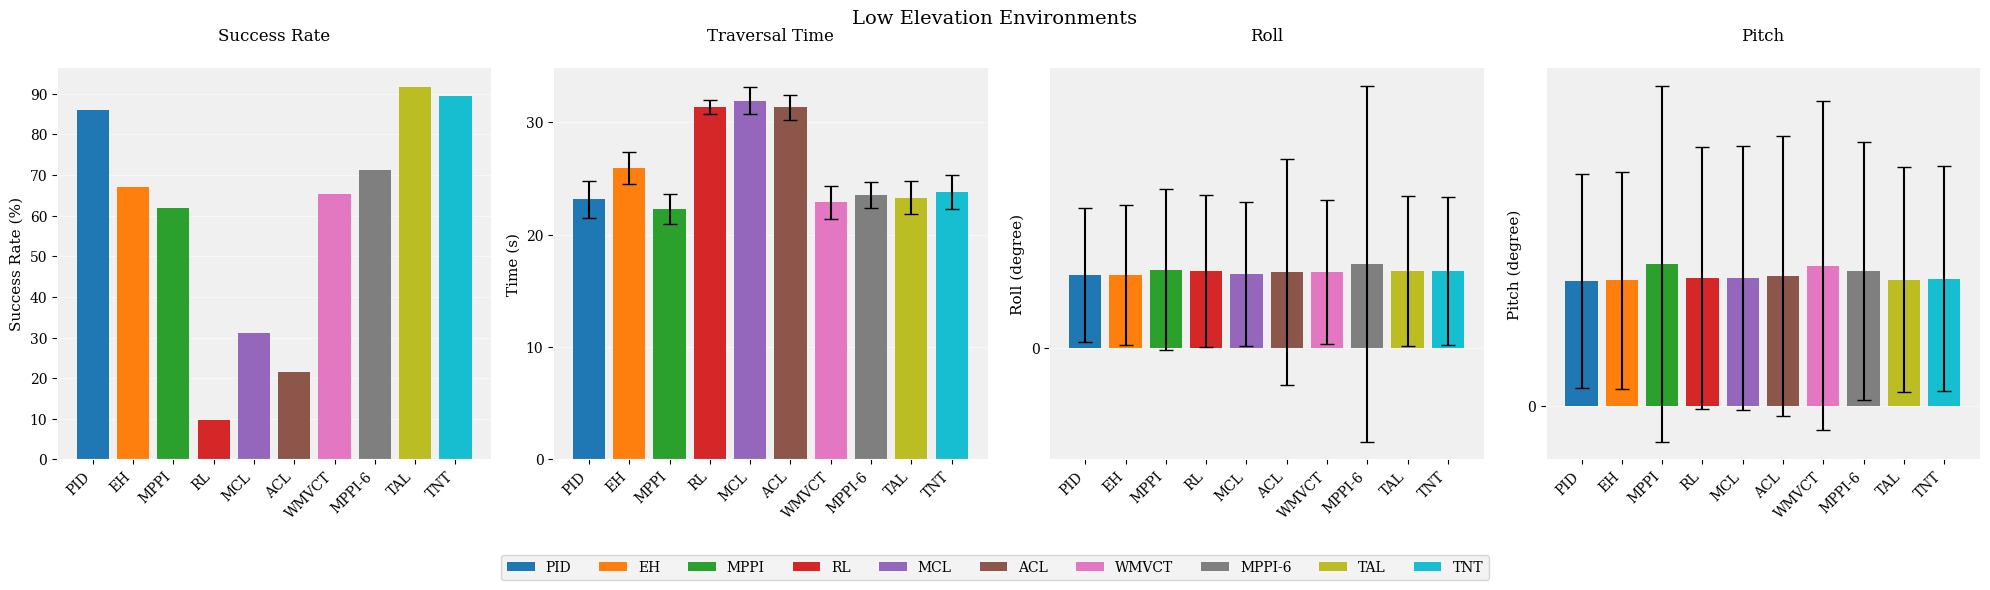

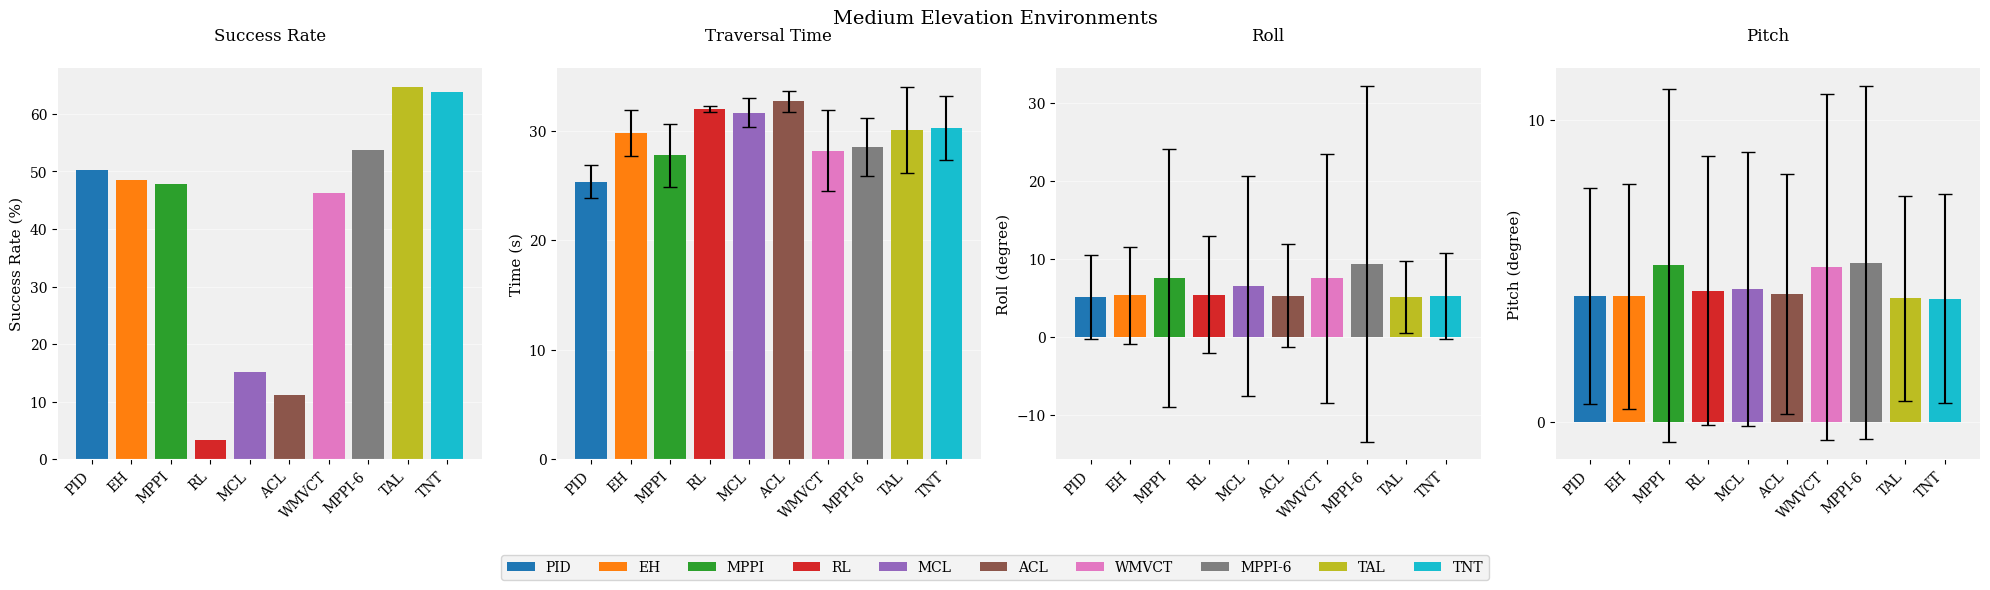

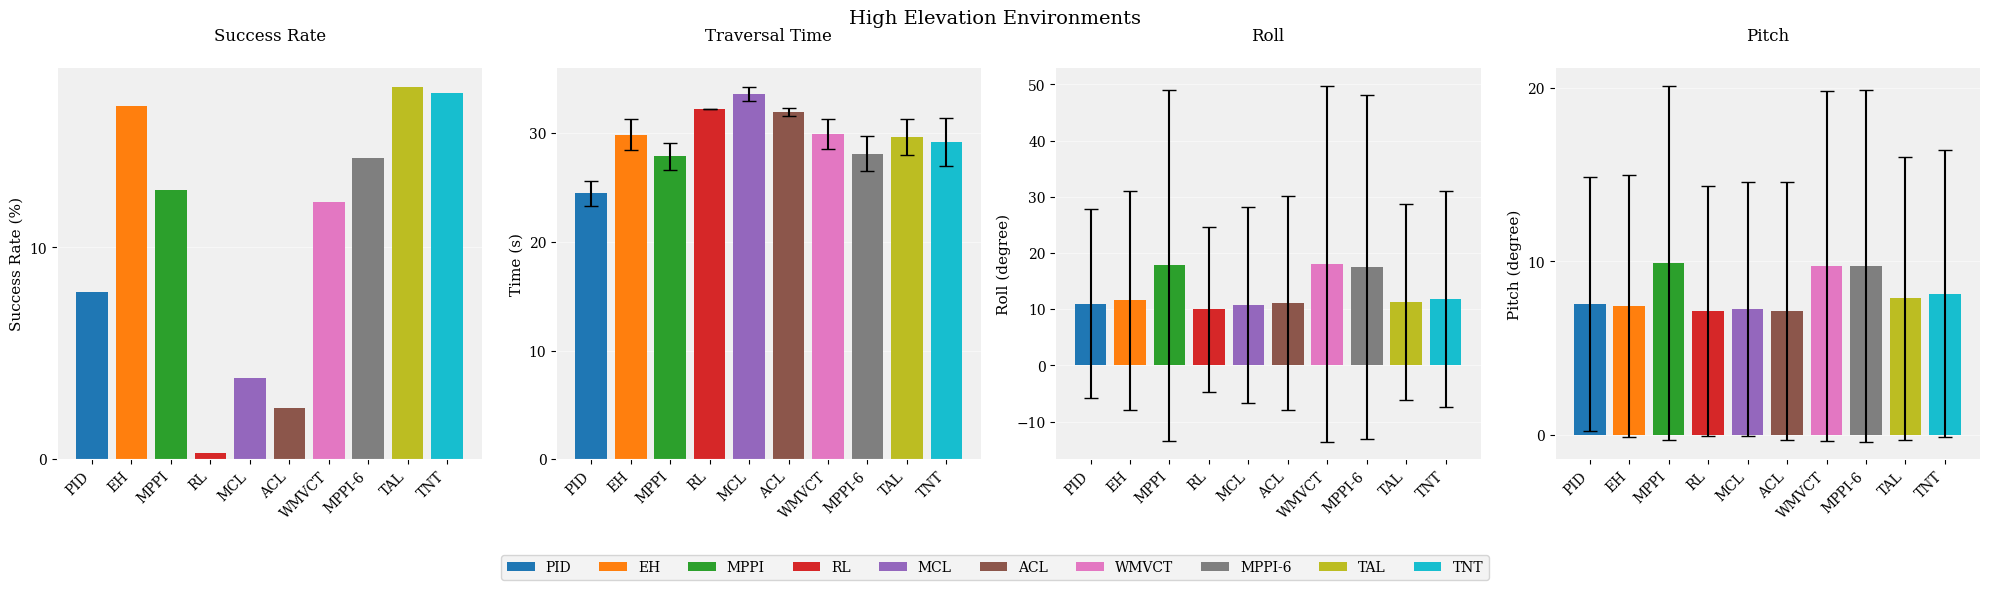

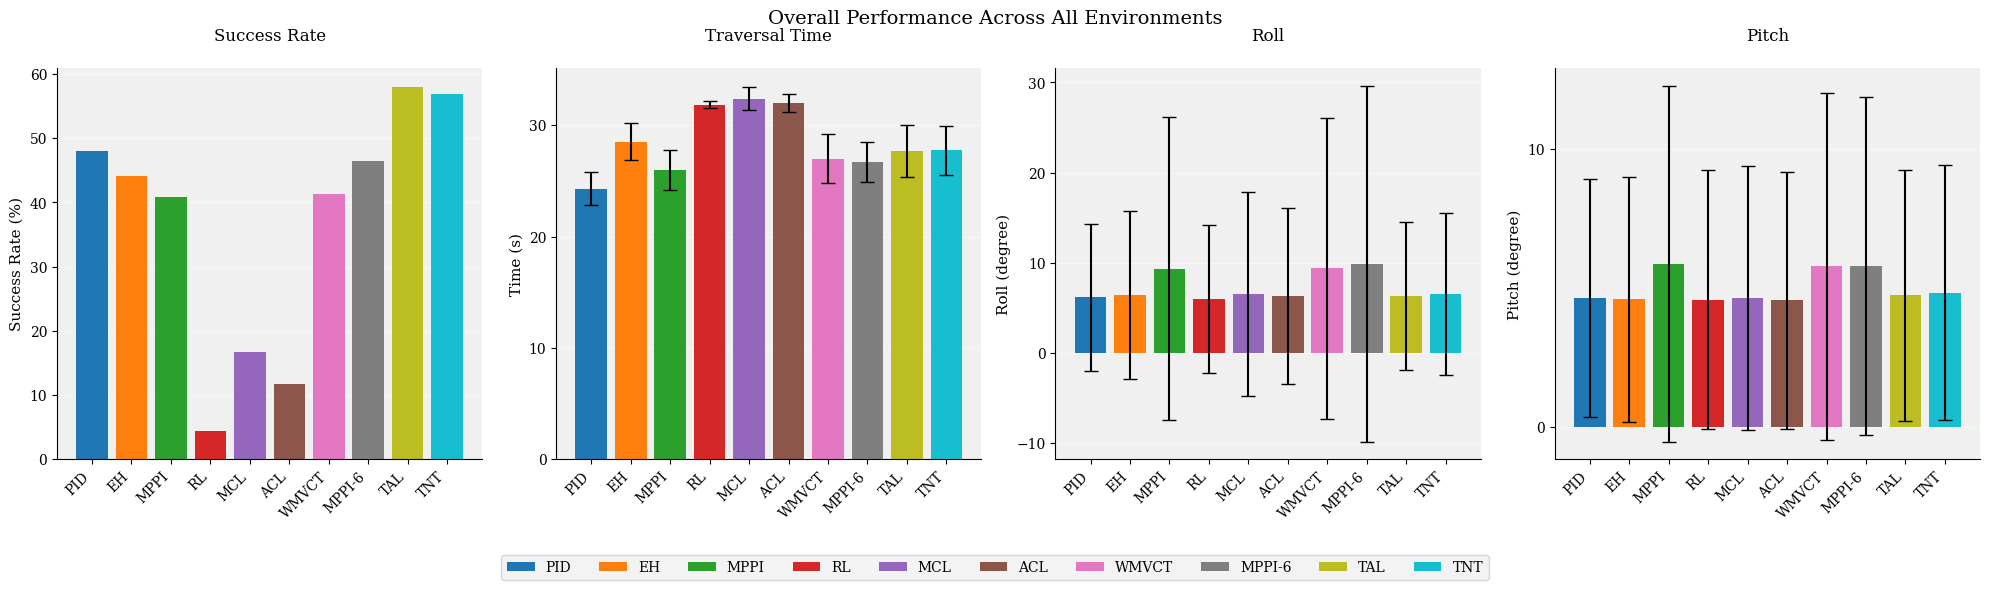

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['axes.facecolor'] = '#F0F0F0'  # Soft gray for plot background only
plt.rcParams['figure.facecolor'] = 'white'  # White figure background
plt.rcParams['grid.color'] = '#FFFFFF'
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['grid.linestyle'] = '-'

def create_difficulty_mapping():
    difficulty_map = {}
    
    low_worlds = [5, 9, 11, 13, 18, 21, 22, 24, 25, 26, 30, 33, 37, 41, 42, 
                 45, 48, 49, 54, 55, 56, 58, 74, 75, 77, 79, 80, 84, 87, 
                 93, 94, 96, 97, 98, 100]
    
    mid_worlds = [3, 7, 8, 14, 16, 17, 20, 28, 29, 31, 32, 34, 35, 36, 40, 
                 46, 52, 53, 62, 63, 66, 68, 69, 71, 78, 82, 83, 88, 90, 
                 91, 95, 99]
    
    high_worlds = [1, 2, 4, 6, 10, 12, 15, 19, 23, 27, 38, 39, 43, 44, 47, 
                  50, 51, 57, 59, 60, 61, 64, 65, 67, 70, 72, 73, 76, 81, 
                  85, 86, 89, 92]
    
    for world in low_worlds:
        difficulty_map[world] = 'Low'
    for world in mid_worlds:
        difficulty_map[world] = 'Medium'
    for world in high_worlds:
        difficulty_map[world] = 'High'
        
    return difficulty_map

def load_and_process_csvs(root_directory):
    data = []
    difficulty_map = create_difficulty_mapping()
    folders = sorted([d for d in os.listdir(root_directory) if os.path.isdir(os.path.join(root_directory, d))])
    
    for folder in folders:
        folder_path = os.path.join(root_directory, folder)
        csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
        
        if csv_files:
            csv_file = csv_files[0]
            df = pd.read_csv(os.path.join(folder_path, csv_file))
            df.columns = ['world_id'] + list(df.columns[1:])
            
            df['difficulty'] = df['world_id'].map(difficulty_map)
            
            for difficulty in ['Low', 'Medium', 'High']:
                df_filtered = df[df['difficulty'] == difficulty]
                if len(df_filtered) > 0:
                    stats = {
                        'name': folder,
                        'difficulty': difficulty,
                        'success_rate': df_filtered['success_rate'].mean() * 100,
                        'traversal_time': df_filtered['mean_traversal_time'].mean(),
                        'traversal_time_std': np.sqrt(df_filtered['variance_traversal_time'].mean()),
                        'roll': df_filtered['mean_roll'].mean(),
                        'roll_std': np.sqrt(df_filtered['variance_roll'].mean()),
                        'pitch': df_filtered['mean_pitch'].mean(),
                        'pitch_std': np.sqrt(df_filtered['variance_pitch'].mean())
                    }
                    data.append(stats)
    
    return pd.DataFrame(data)

def plot_metrics_by_difficulty(data):
    planner_order = ['PID', 'EH', 'MPPI', 'RL', 'MCL', 'ACL', 'WMVCT', 'MPPI-6', 'TAL', 'TNT']
    
    planner_colors = {
        'PID': '#1f77b4', 'EH': '#ff7f0e', 'MPPI': '#2ca02c', 'RL': '#d62728',
        'MCL': '#9467bd', 'ACL': '#8c564b', 'WMVCT': '#e377c2', 'MPPI-6': '#7f7f7f',
        'TAL': '#bcbd22', 'TNT': '#17becf'
    }
    
    metrics = ['success_rate', 'traversal_time', 'roll', 'pitch']
    ylabels = ['Success Rate (%)', 'Time (s)', 'Roll (degree)', 'Pitch (degree)']
    
    for difficulty in ['Low', 'Medium', 'High']:
        fig, axes = plt.subplots(1, 4, figsize=(20, 6))
        fig.patch.set_facecolor('white')
        
        df_diff = data[data['difficulty'] == difficulty]
        
        for ax, metric, ylabel in zip(axes, metrics, ylabels):
            ax.set_facecolor('#F0F0F0')
            
            df_ordered = pd.DataFrame([df_diff[df_diff['name'] == planner].iloc[0] 
                                     for planner in planner_order])
            
            x_positions = np.arange(len(planner_order))
            bars = []
            
            for idx, (_, row) in enumerate(df_ordered.iterrows()):
                color = planner_colors[row['name']]
                bar = ax.bar(x_positions[idx], row[metric], color=color)
                bars.append(bar[0])
            
            if metric in ['traversal_time', 'roll', 'pitch']:
                ax.errorbar(x_positions, df_ordered[metric],
                          yerr=df_ordered[f'{metric}_std'], fmt='none',
                          color='black', capsize=5)
            
            ax.set_title(f'{metric.replace("_", " ").title()}', 
                        fontsize=12, pad=20, color='black')
            ax.set_ylabel(ylabel, fontsize=11, color='black')
            ax.tick_params(axis='both', labelsize=10, colors='black')
            
            ax.grid(True, axis='y', linestyle='-', alpha=0.5, color='white')
            ax.yaxis.set_major_locator(plt.MultipleLocator(10))
            ax.set_axisbelow(True)
            
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_color('white')
            ax.spines['bottom'].set_color('white')
            
            ax.set_xticks(x_positions)
            ax.set_xticklabels(planner_order, rotation=45, ha='right')
        
        legend = fig.legend(bars, planner_order, 
                          loc='center',
                          bbox_to_anchor=(0.5, 0.02),
                          ncol=len(planner_order),
                          fontsize=10)
        legend.get_title().set_color('black')
        for text in legend.get_texts():
            text.set_color('black')
        
        plt.suptitle(f'{difficulty} Elevation Environments', 
                    fontsize=14, y=0.95, color='black')
        
        plt.tight_layout()
        plt.subplots_adjust(bottom=0.2)

def plot_metrics_overall(data):
    planner_order = ['PID', 'EH', 'MPPI', 'RL', 'MCL', 'ACL', 'WMVCT', 'MPPI-6', 'TAL', 'TNT']
    
    planner_colors = {
        'PID': '#1f77b4', 'EH': '#ff7f0e', 'MPPI': '#2ca02c', 'RL': '#d62728',
        'MCL': '#9467bd', 'ACL': '#8c564b', 'WMVCT': '#e377c2', 'MPPI-6': '#7f7f7f',
        'TAL': '#bcbd22', 'TNT': '#17becf'
    }
    
    metrics = ['success_rate', 'traversal_time', 'roll', 'pitch']
    ylabels = ['Success Rate (%)', 'Time (s)', 'Roll (degree)', 'Pitch (degree)']
    
    fig, axes = plt.subplots(1, 4, figsize=(20, 6))
    fig.patch.set_facecolor('white')
    
    for ax, metric, ylabel in zip(axes, metrics, ylabels):
        ax.set_facecolor('#F0F0F0')
        
        # Calculate mean values for each planner across all difficulties
        df_means = []
        df_stds = []
        for planner in planner_order:
            planner_data = data[data['name'] == planner]
            mean_value = planner_data[metric].mean()
            df_means.append(mean_value)
            if metric in ['traversal_time', 'roll', 'pitch']:
                std_value = planner_data[f'{metric}_std'].mean()
                df_stds.append(std_value)
        
        x_positions = np.arange(len(planner_order))
        bars = []
        
        for idx, (planner, mean_value) in enumerate(zip(planner_order, df_means)):
            color = planner_colors[planner]
            bar = ax.bar(x_positions[idx], mean_value, color=color)
            bars.append(bar[0])
        
        if metric in ['traversal_time', 'roll', 'pitch']:
            ax.errorbar(x_positions, df_means,
                      yerr=df_stds, fmt='none',
                      color='black', capsize=5)
        
        ax.set_title(f'{metric.replace("_", " ").title()}', 
                    fontsize=12, pad=20, color='black')
        ax.set_ylabel(ylabel, fontsize=11, color='black')
        ax.tick_params(axis='both', labelsize=10, colors='black')
        
        ax.grid(True, axis='y', linestyle='-', alpha=0.5, color='white')
        ax.yaxis.set_major_locator(plt.MultipleLocator(10))
        ax.set_axisbelow(True)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color('black')
        ax.spines['bottom'].set_color('black')
        
        ax.set_xticks(x_positions)
        ax.set_xticklabels(planner_order, rotation=45, ha='right')
    
    legend = fig.legend(bars, planner_order, 
                      loc='center',
                      bbox_to_anchor=(0.5, 0.02),
                      ncol=len(planner_order),
                      fontsize=10)
    legend.get_title().set_color('black')
    for text in legend.get_texts():
        text.set_color('black')
    
    plt.suptitle('Overall Performance Across All Environments', 
                fontsize=14, y=0.95, color='black')
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)

# Usage example
root_directory = '/home/chenhui/Documents/verti_bench/baselines/res'
data = load_and_process_csvs(root_directory)
plot_metrics_by_difficulty(data)
plot_metrics_overall(data)
plt.show()

In [ ]:
#4x3 matrix plot

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.ticker import FuncFormatter, MaxNLocator

plt.style.use('default')
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

def create_standalone_legend(planner_colors, output_dir):
    """Create a separate figure for the legend"""
    fig = plt.figure(figsize=(15, 0.5))
    ax = fig.add_subplot(111)
    ax.axis('off')
    
    handles = [plt.Rectangle((0,0),1,1, color=planner_colors[planner]) 
              for planner in planner_colors.keys()]
    
    legend = ax.legend(handles, planner_colors.keys(),
                      loc='center',
                      ncol=len(planner_colors),
                      bbox_to_anchor=(0.5, 0.5),
                      fontsize=12)
    
    fig.savefig(os.path.join(output_dir, 'legend.pdf'),
                bbox_inches='tight',
                dpi=300)
    plt.close(fig)

def format_int(x, p):
    """Format numbers as integers"""
    return f"{int(x)}"

def get_axis_limits(data, metric):
    """Calculate exact y-axis limits based on the metric"""
    values = data[metric]
    std_col = f'{metric}_std' if metric in ['traversal_time', 'roll', 'pitch'] else None
    
    if metric == 'success_rate':
        max_val = values.max()
        return 0, min(100, max_val * 1.1)
    
    elif metric == 'traversal_time':
        max_val = values.max()
        if std_col:
            max_val += data[std_col].max()
        actual_max = min(35, max_val)
        return 20, actual_max
    
    elif metric == 'roll':
        min_with_error = values - data[std_col]
        actual_min = min_with_error.min()
        max_with_error = values + data[std_col]
        actual_max = min(35, max_with_error.max())
        min_val = actual_min - 1
        max_val = actual_max + 1
        return min_val, max_val
    
    else:  # pitch
        min_with_error = values - data[std_col]
        actual_min = min_with_error.min()
        max_with_error = values + data[std_col]
        actual_max = max_with_error.max()
        min_val = actual_min - 1
        max_val = actual_max + 1
        return min_val, max_val

def plot_single_metric(data, metric):
    planner_order = ['PID', 'EH', 'MPPI', 'RL', 'MCL', 'ACL', 'WMVCT', 'MPPI-6', 'TAL', 'TNT']
    difficulties = ['Low', 'Medium', 'High', 'Overall']
    
    planner_colors = {
        # Category 1 - Blues
        'PID': '#1f77b4',    # Darker blue
        'EH': '#4e9cd6',     # Medium blue
        'MPPI': '#7fbfff',   # Lighter blue
        
        # Category 2 - Reds
        'RL': '#d62728',     # Darker red
        'MCL': '#ff4d4d',    # Medium red
        'ACL': '#ff7f7f',    # Lighter red
        
        # Category 3 - Greens
        'WMVCT': '#2ca02c',  # Darker green
        'MPPI-6': '#5cbd5c', # Medium green
        'TAL': '#85d685',    # Light green
        'TNT': '#a8eda8'     # Lightest green
    }
    
    metric_labels = {
        'success_rate': 'Success Rate',
        'traversal_time': 'Traversal Time',
        'roll': 'Roll',
        'pitch': 'Pitch'
    }
    
    metric_units = {
        'success_rate': '(%)',
        'traversal_time': '(s)',
        'roll': '(degree)',
        'pitch': '(degree)'
    }
    
    # Create figure
    fig = plt.figure(figsize=(15, 6))
    ax = fig.add_subplot(111)
    
    fig.patch.set_facecolor('white')
    ax.set_facecolor('#F0F0F0')
    
    # Remove tick marks while keeping labels
    ax.tick_params(axis='both', length=0)
    
    # Calculate the width for each group of bars
    width = 0.08
    n_groups = len(difficulties)
    group_width = len(planner_order) * width
    group_positions = np.arange(n_groups) * (group_width + 0.4)
    
    for planner_idx, planner in enumerate(planner_order):
        values = []
        errors = []
        
        for diff_idx, difficulty in enumerate(difficulties[:-1]):
            planner_data = data[(data['difficulty'] == difficulty) & 
                              (data['name'] == planner)]
            
            if len(planner_data) > 0:
                value = planner_data[metric].iloc[0]
                error = planner_data[f'{metric}_std'].iloc[0] if metric in ['traversal_time', 'roll', 'pitch'] else None
                values.append(value)
                errors.append(error)
        
        # Calculate overall statistics
        planner_all_data = data[data['name'] == planner]
        overall_value = planner_all_data[metric].mean()
        values.append(overall_value)
        if metric in ['traversal_time', 'roll', 'pitch']:
            overall_error = np.sqrt(planner_all_data[f'{metric}_std'].pow(2).mean())
            errors.append(overall_error)
        
        x = group_positions + planner_idx * width
        
        # Plot bars
        bars = ax.bar(x, values, width, label=planner,
                     color=planner_colors[planner])
        
        # Add error bars if applicable
        if metric in ['traversal_time', 'roll', 'pitch']:
            ax.errorbar(x, values, yerr=errors, fmt='none', color='black',
                      capsize=3, capthick=1, elinewidth=1)
    
    # Customize axes
    ax.set_xticks(group_positions + (len(planner_order) - 1) * width / 2)
    ax.set_xticklabels(difficulties)
    
    # Get optimized y-axis limits
    y_min, y_max = get_axis_limits(data, metric)
    ax.set_ylim(y_min, y_max)
    
    # Adjust tick spacing based on range
    range_size = y_max - y_min
    if metric == 'success_rate':
        tick_spacing = 20
    elif metric == 'traversal_time':
        tick_spacing = 5
    else:  # roll and pitch
        tick_spacing = max(1, int(range_size / 5))
    
    ax.yaxis.set_major_locator(plt.MultipleLocator(tick_spacing))
    ax.yaxis.set_major_formatter(FuncFormatter(format_int))
    
    # Set y-axis label with units in bold
    ylabel = f"{metric_labels[metric]} {metric_units[metric]}"
    ax.set_ylabel(ylabel, rotation=90, labelpad=15, va='center', weight='bold')
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    
    # Add bolder grid lines
    ax.yaxis.grid(True, linestyle='-', linewidth=1.5, alpha=0.6, color='white')
    ax.set_axisbelow(True)
    
    plt.tight_layout()
    
    return fig, planner_colors

def create_all_plots(data, output_dir='output_plots'):
    """Create all plots and separate legend"""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    metrics = ['success_rate', 'traversal_time', 'roll', 'pitch']
    planner_colors = None
    
    # Fixed the iteration over metrics
    for metric in metrics:
        fig, colors = plot_single_metric(data, metric)
        if planner_colors is None:
            planner_colors = colors
        
        # Save plot as PDF
        pdf_path = os.path.join(output_dir, f'{metric}.pdf')
        fig.savefig(pdf_path, bbox_inches='tight', dpi=300)
        plt.close(fig)
    
    # Create and save standalone legend
    create_standalone_legend(planner_colors, output_dir)

# Usage
root_directory = '/home/chenhui/Documents/verti_bench/baselines/res'
data = load_and_process_csvs(root_directory)
create_all_plots(data)

TypeError: 'module' object is not callable